In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Рассматриваемый датасет был предложен Еленой Ставровской 
https://www.kaggle.com/gevvahraf/alc-consumption-and-higher-education?select=student-mat.csv%C2%A0

In [ ]:
mat_data = pd.read_csv("D:\Jupiter_data\school\student-mat.csv")
mat_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Выведем информацию о DataFrame.

In [ ]:
np.shape(mat_data)

(395, 33)

In [ ]:
mat_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
mat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Для проверки на дубликатные значения, будем использовать duplicated

In [ ]:
for i in mat_data.duplicated():
    if i==True:
        print("Duplicates exist")
mat_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391    False
392    False
393    False
394    False
Length: 395, dtype: bool

Выделим отдельно числовые признаки (в том числе и ранжированные) и категориальные.

In [ ]:
cat_columns = [i for i in mat_data if mat_data[i].dtype.name == "object"]
num_columns = [i for i in mat_data if np.issubdtype(mat_data[i].dtype, np.number)]

In [ ]:
print(cat_columns)
len(cat_columns)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


17

In [ ]:
print(num_columns)
len(num_columns)

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


16

Построим матрицу корреляции признаков между собой, видим, что наблюдается сильная положительная корреляция между  (G1  G2  G3), это говорит о том, что  студенты, имеющие хорошие оценки в начальном периоде обучения, имеют тенденцию продолжать хорошо учиться

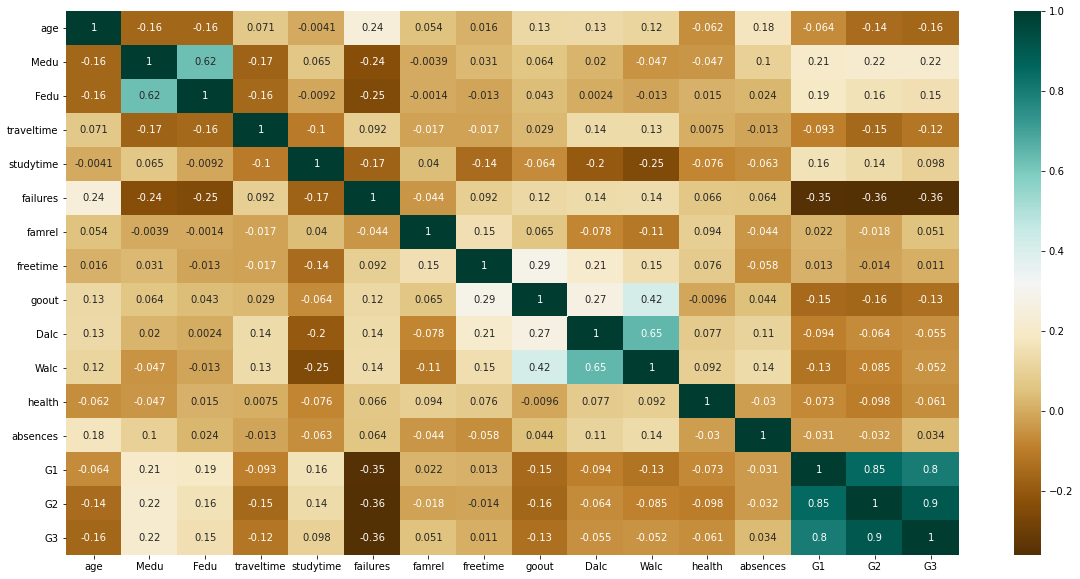

In [ ]:
c = mat_data[num_columns].corr()
plt.figure(figsize=(20,10))
sns.heatmap(c, cmap="BrBG",annot=True)

Построим распределение числовые признаков, чтобы прикинуть какое распределение может иметь каждая величина (числовая)

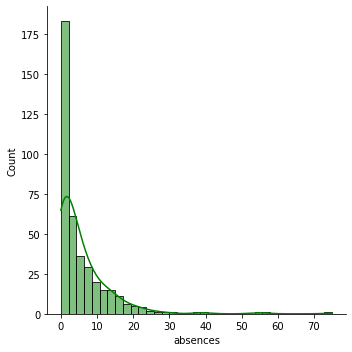

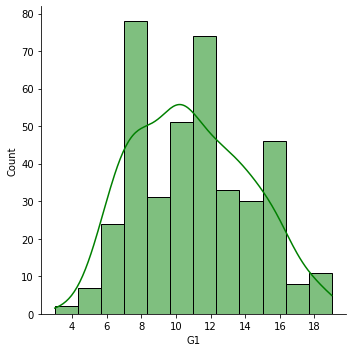

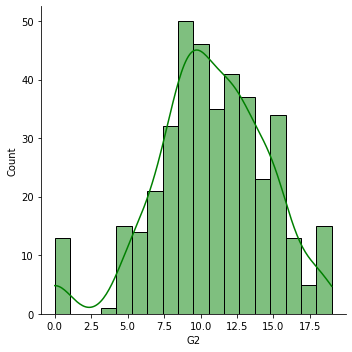

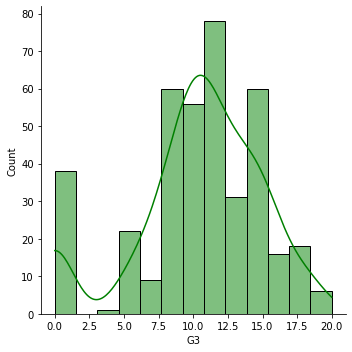

In [ ]:
# sns.displot(mat_data[num_columns], kde=True, )
num_col = ["absences", "G1", "G2", "G3"]
for i in num_col:
    sns.displot(data =mat_data, x=i, color="green", kde=True)

Распределим студентов по количеству времени уделяемому на образовательный процесс, то есть придадим данным в колонке "studytime"  наглядность. Построив boxplot(kind="violin") обнаружим, что медианное значение показателя G3 больше у студентов, которые тратили на учебу больше времени.

In [ ]:
mat_data["studytime"].unique()

array([2, 3, 1, 4], dtype=int64)

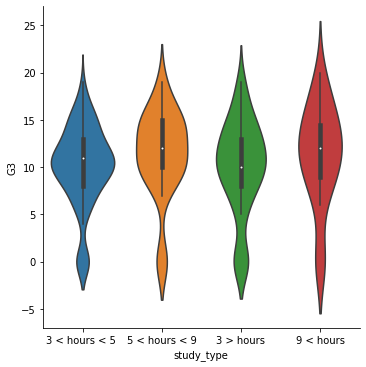

In [ ]:
mat_data["study_type"] = np.where(mat_data["studytime"] == 1, "3 > hours",
                                 np.where(mat_data["studytime"] == 2, "3 < hours < 5 ",
                                         np.where(mat_data["studytime"] == 3, "5 < hours < 9", "9 < hours")))
sns.catplot(data=mat_data, x="study_type", y="G3", kind="violin")

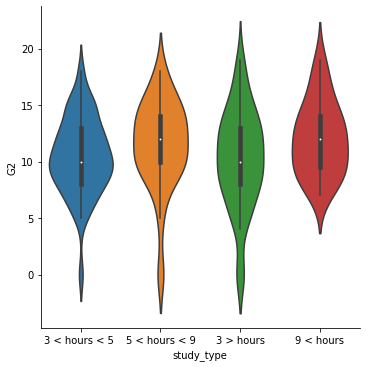

In [ ]:
sns.catplot(data=mat_data, x="study_type", y="G2", kind="violin")

Проделаем аналогичный анализ для студентов, которые в разной степени злоупотребляют алкоголем.
Сгруппировав данные в три позиции ("Walc" < 3 - low, "Walc" == 4 - medium, "Walk" == 5 - high) и постороив по ним boxplot, обнаружим, что успеваемость малопьющих студентов превышает успеваемость остальных

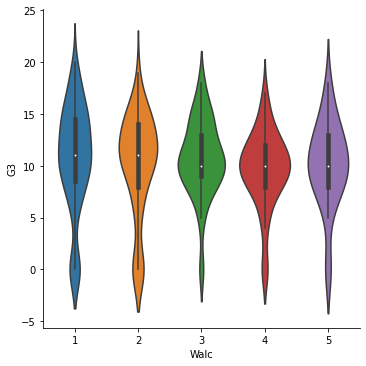

In [ ]:
sns.catplot(data=mat_data, x="Walc", y="G3", kind="violin")

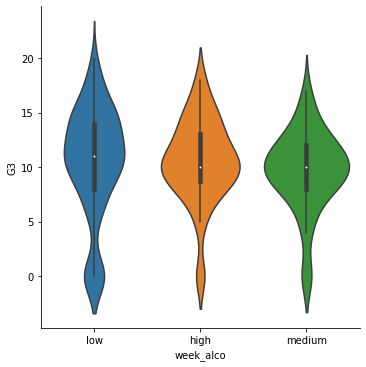

In [ ]:
mat_data["week_alco"] = np.where(mat_data["Walc"] < 3, "low", 
                                np.where(mat_data["Walc"] == 4, "medium", "high"))
sns.catplot(data=mat_data, x="week_alco", y="G3", kind="violin")

Проанализируем, как наличие романтических отношений влияет на мальчиков и на девочек.
Из полученных графиков заметно некоторое смещение модального значения успеваемости вправо (т.е. к более высокому баллу по G3) у студентов, находящихся в отношениях.

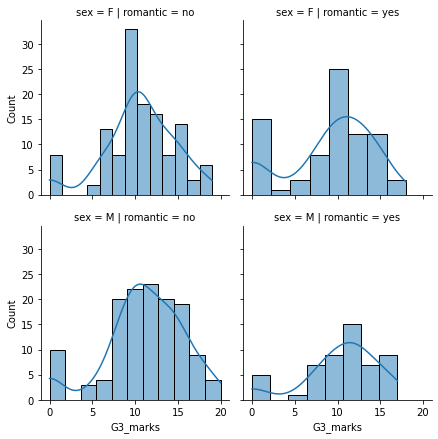

In [ ]:
g = sns.FacetGrid(data=mat_data, col="romantic", row="sex")
g.map_dataframe(sns.histplot, x="G3", kde=True)
g.set_axis_labels("G3_marks", "Count")

Более наглядное представление данных по студентам, употребляющим алкоголь

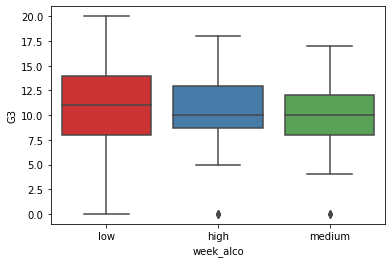

In [ ]:
sns.boxplot(data=mat_data, x="week_alco", y="G3", palette="Set1")

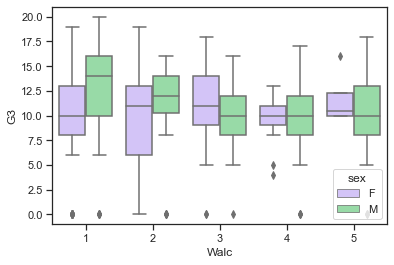

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Walc", y="G3", data=mat_data, hue="sex", palette=["m", "g"])

In [ ]:
mat_data["sex"][(mat_data["sex"] == "F") & (mat_data["Walc"] == 5)].count()

4

На следующем графике изображено влияние факторов таких как романтические отношения и количество потребляемого алкоголя в неделю (в группах high, low, medium level) на успеваемость. 

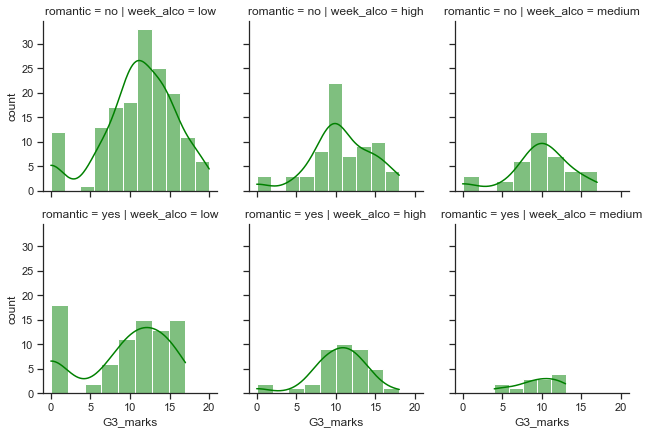

In [ ]:
g = sns.FacetGrid(data=mat_data, row="romantic", col = "week_alco")
g.map_dataframe(sns.histplot, x="G3", kde=True, color="green")
g.set_axis_labels("G3_marks","count")

Исследуем есть ли зависимость между прогулами и возрастом, прогулами и романтическими отношениями

In [ ]:
mat_data["age_type"] = np.where(mat_data["age"] < 16, "молодой", 
                               np.where(mat_data["age"] < 18, "бывалый", "дедушка"))

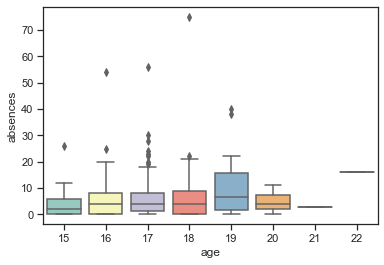

In [ ]:
sns.boxplot(y="absences", x="age", palette="Set3", data=mat_data)

Из полученного boxplot видно:
1) студентов с возрастом 21, 22 - очень мало
2) сильнее всего прогуливают 19-летние студенты
3) возраст влияет на количество пропусков, но не сильно

Ходят слухи, что интеллект достается ребенку от матери, опробуем данное утверждение на данных. К сожалению из-за недостаточно большого объема выборки (откровенно говоря малого), не удастся исключить влияние остальных факторов (например разбивая студентов на группы с ожинаковыми параметрами studytime, Walc, Dalc)

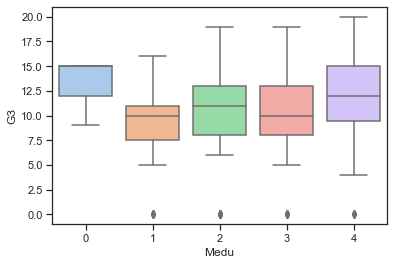

In [ ]:
sns.boxplot(data=mat_data, x="Medu", y="G3")


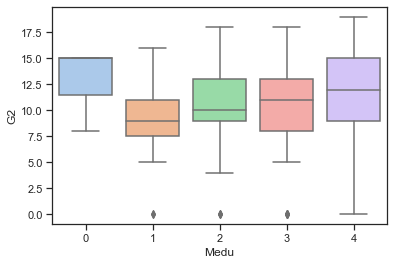

In [ ]:
sns.boxplot(data=mat_data, x="Medu", y="G2")


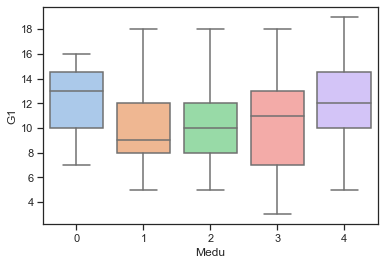

In [ ]:
sns.boxplot(data=mat_data, x="Medu", y="G1")

Действительно, образование матери влияет на успеваемость ребенка, однако данные, где у матери нет образования выбиваются общих данных.